In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("default")

In [2]:
districts = gpd.read_file("Shapefiles/districts.shp")

In [3]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [4]:
districts

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


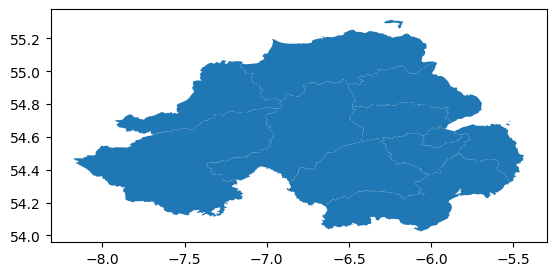

In [7]:
districts.plot();

### Choose any color map
https://matplotlib.org/tutorials/colors/colormaps.html

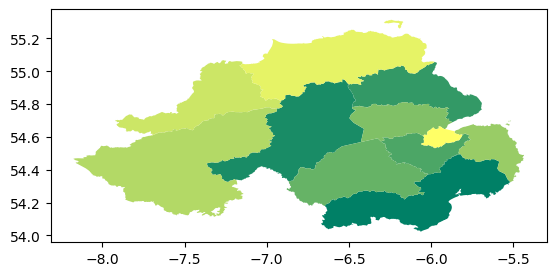

In [12]:
districts.plot(cmap="summer");

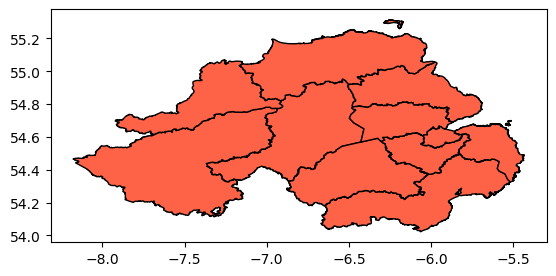

In [13]:
districts.plot(color="tomato", edgecolor="black");

In [15]:
districts.columns

Index(['district', 'geometry'], dtype='object')

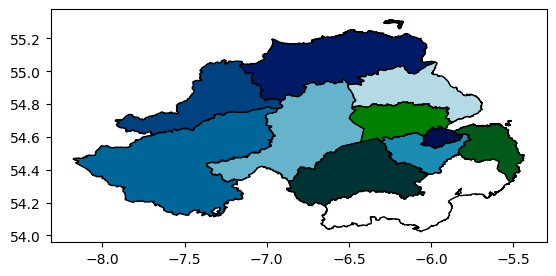

In [19]:
districts.plot(cmap="ocean", edgecolor="black", column="district");

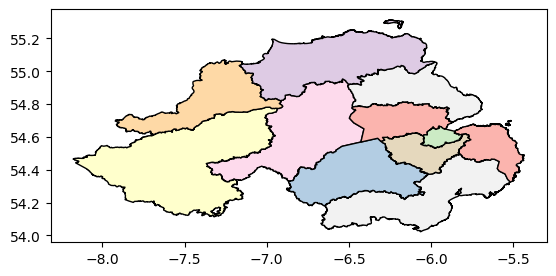

In [21]:
districts.plot(cmap="Pastel1", edgecolor="black", column="district");

## load another shape file

In [22]:
area_of_interest = gpd.read_file("Shapefiles/area_of_interest.shp")

In [23]:
area_of_interest.columns

Index(['Id', 'geometry'], dtype='object')

In [24]:
area_of_interest

,Id,geometry
0,0,"POLYGON ((-7.10243 54.53227, -7.10175 54.53254..."


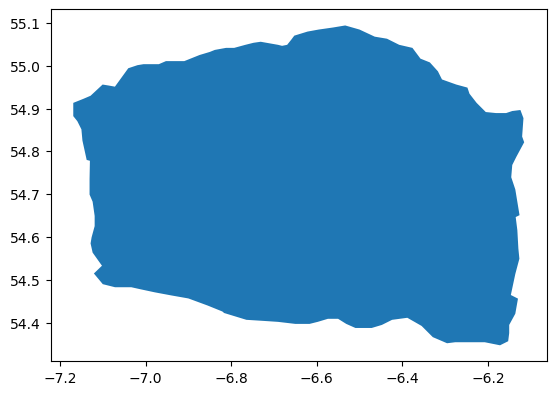

In [25]:
area_of_interest.plot();

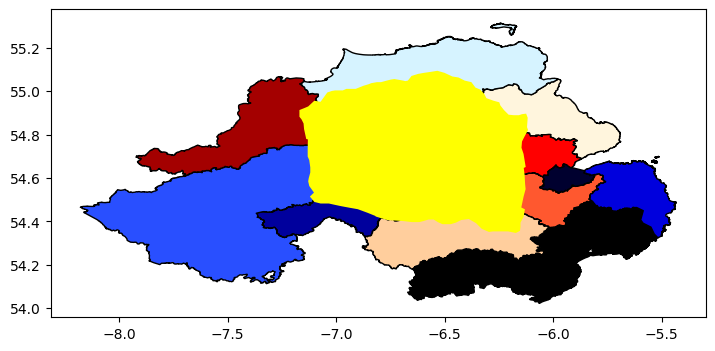

In [32]:
fig, ax = plt.subplots(figsize=(10,4))
districts.plot(ax=ax, cmap="flag", edgecolor="black", column="district")
area_of_interest.plot(ax=ax, color="yellow");

#### Area of interest is covering the main map

plot has no `opacity` attribute, instead it has `alpha`

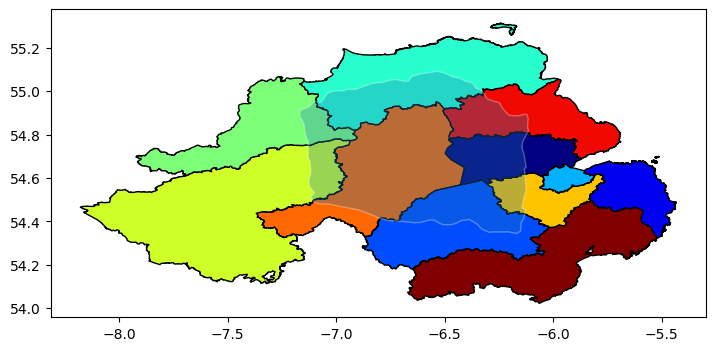

In [38]:
fig, ax = plt.subplots(figsize=(10,4))
districts.plot(ax=ax, cmap="jet", edgecolor="black", column="district")
area_of_interest.plot(ax=ax, edgecolor="white", alpha=0.3);

### load `atms.shp`

In [39]:
atms = gpd.read_file("Shapefiles/atms.shp")

In [40]:
atms.columns

Index(['operator', 'geometry'], dtype='object')

In [43]:
len(atms)

41

In [46]:
atms.isnull().sum()

operator    23
geometry     0
dtype: int64

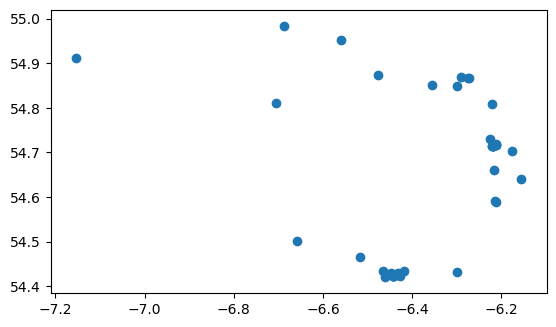

In [47]:
atms.plot();

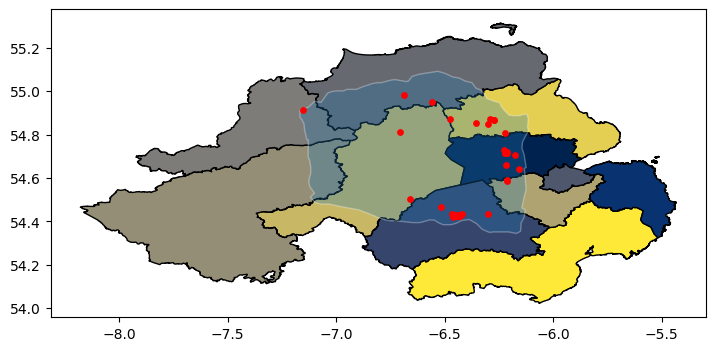

In [55]:
fig, ax = plt.subplots(figsize=(10,4))
districts.plot(ax=ax, cmap="cividis", edgecolor="black", column="district")
area_of_interest.plot(ax=ax, edgecolor="white", alpha=0.3)
atms.plot(ax=ax, color="red", markersize=15);

In [56]:
districts.crs

{'init': 'epsg:4326'}

- EPSG stands for European Petroleum Survey Group and is an organization that maintains a geodetic parameter database with standard codes, the EPSG codes, for coordinate systems, datums, spheroids, units and such alike. ... Every geographic object (coordinate system, spheroid, unit etc.) gets assigned a unique number.

- 4326 is just the EPSG identifier of WGS84.

- WGS 84 is an Earth-centered, Earth-fixed terrestrial reference system. and geodetic datum. WGS 84 is based on a consistent set of constants and model parameters that describe the Earth's size, shape, and gravity and geomagnetic fields.

- WGS (World Geodectic System)

### Let's see how can we change this co-ordinate reference system

We'll use `to_crs()`. crs = co-ordinate reference system

In [61]:
c_districts = districts.to_crs(epsg=32629)

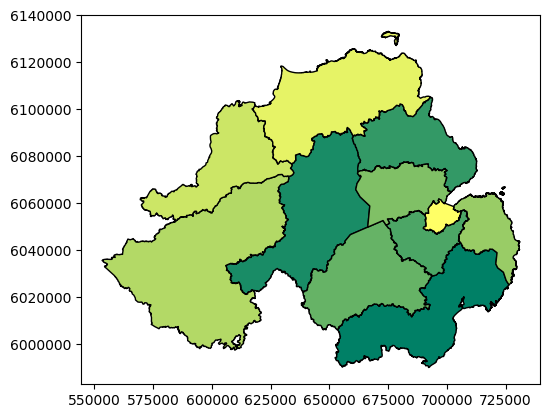

In [63]:
c_districts.plot(edgecolor="black", cmap="summer");

In [64]:
c_area_of_interest = area_of_interest.to_crs(epsg=32629)

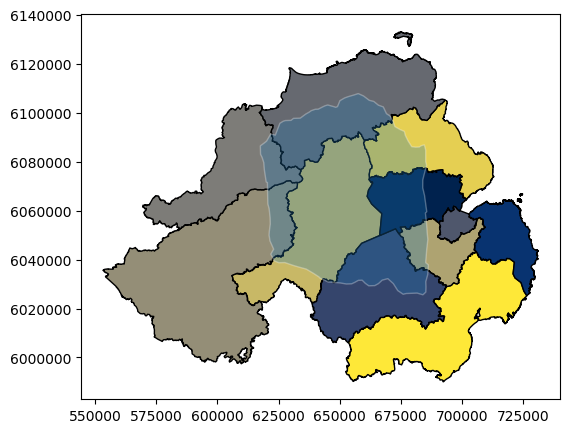

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
c_districts.plot(ax=ax, cmap="cividis", edgecolor="black", column="district")
c_area_of_interest.plot(ax=ax, edgecolor="white", alpha=0.3);

## Intersecting layers with geo pandas

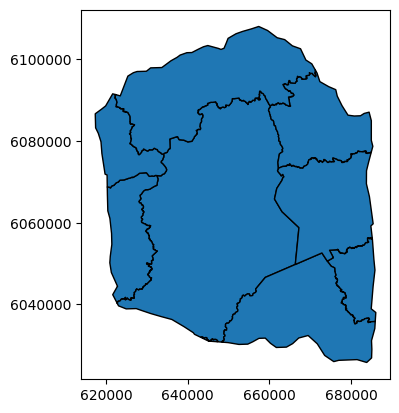

In [75]:
dist_in_aoi = gpd.overlay(c_districts, c_area_of_interest)
dist_in_aoi.plot(edgecolor="black");

### Geometrical computations (calculating areas of polygons)

In [76]:
dist_in_aoi.columns

Index(['district', 'Id', 'geometry'], dtype='object')

In [79]:
# area will be in sq/ meter, so, divide by 1000000 to covert it into sq. km
dist_in_aoi["area"] = dist_in_aoi.area/1000000

In [80]:
dist_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676032.651 6048086.094, 676033...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6...",462.822918
5,Fermanagh and Omagh,0,"POLYGON ((628746.570 6072158.485, 628751.931 6...",262.996444
6,Derry City and Strabane,0,"POLYGON ((622292.459 6091384.089, 622292.384 6...",187.500979
7,Causeway Coast and Glens,0,"POLYGON ((671302.332 6097252.019, 671301.064 6...",747.580677


### Exporting Geopandas GeoDataFrames into ESRI Shapefiles 

In [81]:
dist_in_aoi.to_file("districts_within_aoi.shp")